# Imports


In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier    
from lightgbm import LGBMClassifier 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [159]:
df=pd.read_excel('Telco_customer_churn.xlsx')
df.head(10)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [161]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [162]:
df.duplicated().sum()

0

In [163]:
df.drop(columns=['CustomerID','Count','Zip Code','Lat Long','Churn Reason'],inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            7043 non-null   object 
 1   State              7043 non-null   object 
 2   City               7043 non-null   object 
 3   Latitude           7043 non-null   float64
 4   Longitude          7043 non-null   float64
 5   Gender             7043 non-null   object 
 6   Senior Citizen     7043 non-null   object 
 7   Partner            7043 non-null   object 
 8   Dependents         7043 non-null   object 
 9   Tenure Months      7043 non-null   int64  
 10  Phone Service      7043 non-null   object 
 11  Multiple Lines     7043 non-null   object 
 12  Internet Service   7043 non-null   object 
 13  Online Security    7043 non-null   object 
 14  Online Backup      7043 non-null   object 
 15  Device Protection  7043 non-null   object 
 16  Tech Support       7043 

- Removed Unneeded Columns and column with null values

# EDA

<Axes: >

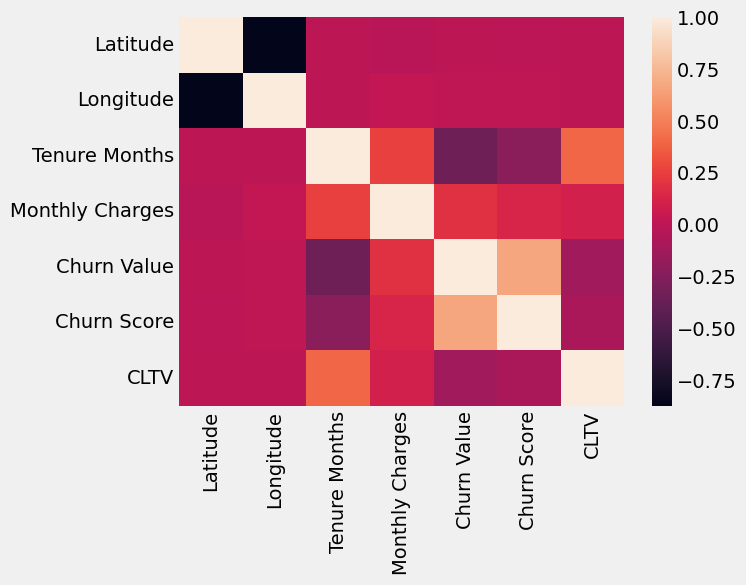

In [165]:
sns.heatmap(df.corr(numeric_only=True))

## UniVariate Analysis

### Country Column

In [166]:
df.Country.value_counts()

Country
United States    7043
Name: count, dtype: int64

- All are from one Country so it is irrelevant Data

### State Column

In [167]:
df.State.value_counts()

State
California    7043
Name: count, dtype: int64

- All are from one State so its irrelevant Data

In [168]:
df.drop(columns=['Country','State'],inplace=True)

### City Column

In [169]:
counts=df.City.value_counts().head(20)
counts

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
Fresno             64
Long Beach         60
Oakland            52
Stockton           44
Bakersfield        40
Glendale           40
Riverside          32
Berkeley           32
Whittier           30
Pasadena           30
Santa Barbara      28
Anaheim            28
San Bernardino     28
Modesto            28
Irvine             28
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\1762670937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


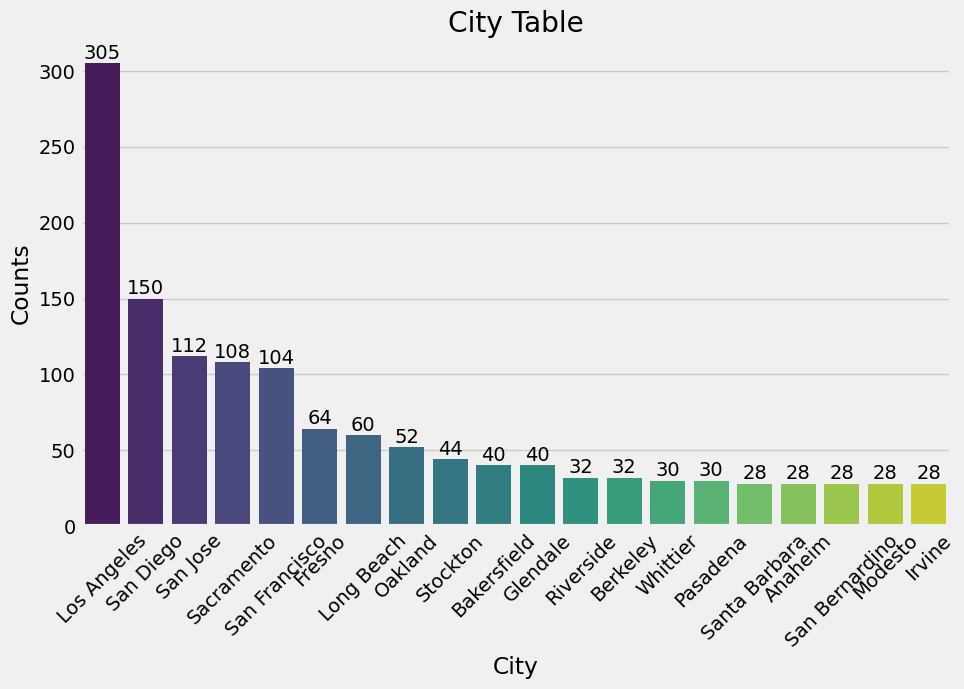

In [170]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('City')
plt.xticks(rotation=45)
plt.title('City Table')
plt.ylabel('Counts')
plt.show()

- Most Churn are from Los Angeles 

### Latitude and Longitude and City Column

In [171]:
# import folium
# m = folium.Map(location=[36.282441,-119.798880], zoom_start=10)
# locations = list(zip(df.Latitude, df.Longitude, df.City))
# for lat, lon, name in locations:
#     folium.Marker([lat, lon], popup=name).add_to(m)

# m.save('map.html')
# m

- Latitude and Longitude and City 

### Gender Column

In [172]:
counts=df.Gender.value_counts()
counts

Gender
Male      3555
Female    3488
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\3817456920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


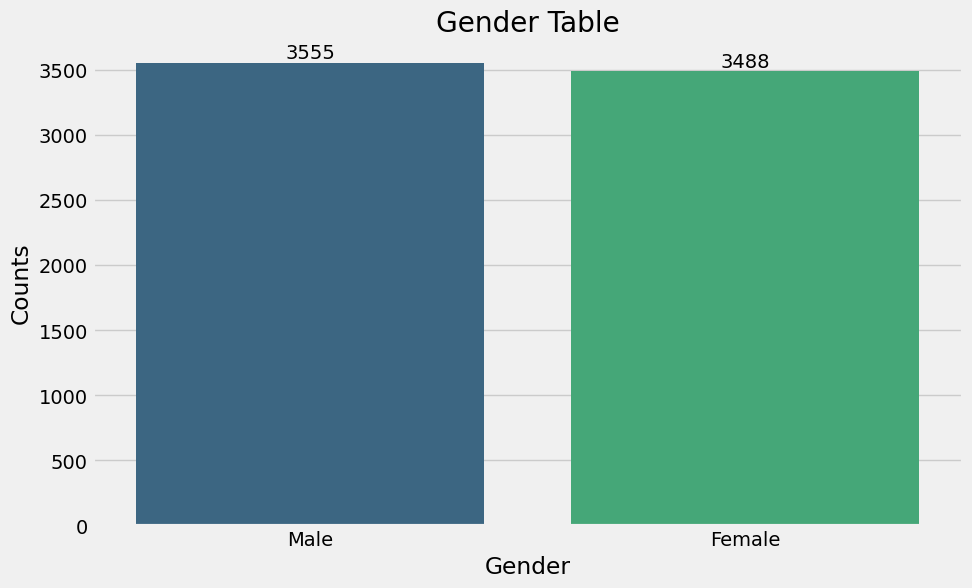

In [173]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Gender')
plt.title('Gender Table')
plt.ylabel('Counts')
plt.show()

- Male is slightly more than Female

### Senior Citizen Column

In [174]:
counts=df['Senior Citizen'].value_counts()
counts

Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\765689801.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


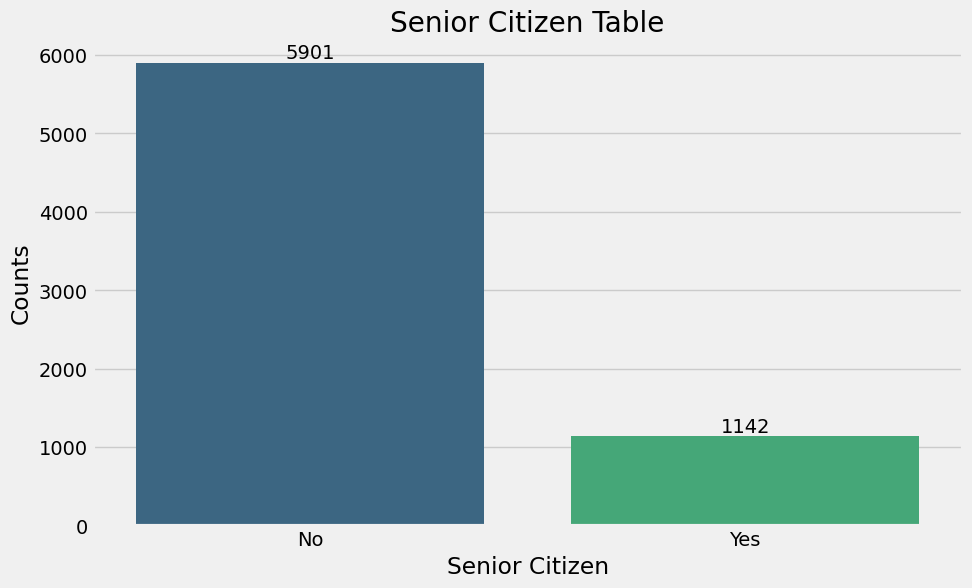

In [175]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Senior Citizen')
plt.title('Senior Citizen Table')
plt.ylabel('Counts')
plt.show()

- Most Customers are not Senior Citizens

### Partner Column

In [176]:
counts=df.Partner.value_counts()
counts

Partner
No     3641
Yes    3402
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\1452790774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


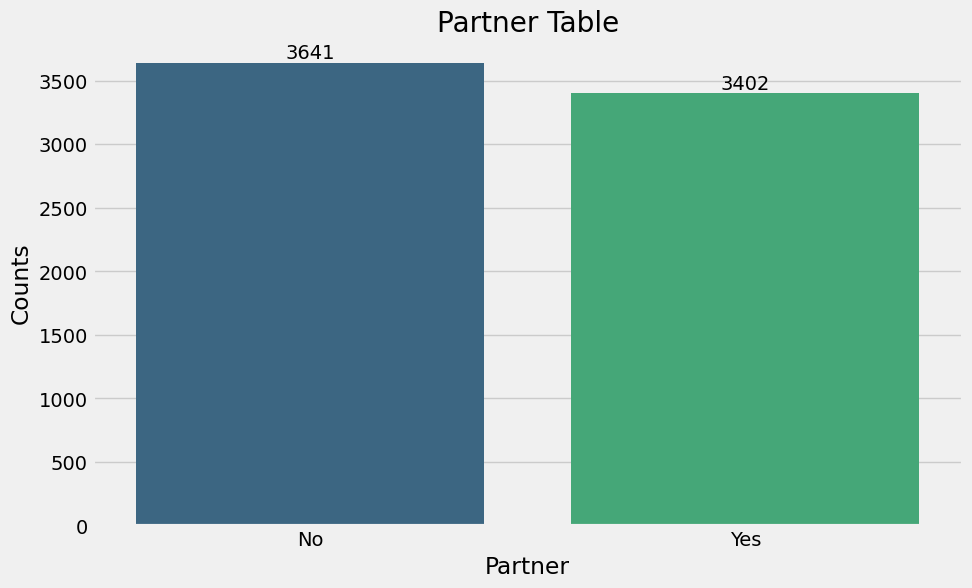

In [177]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Partner')
plt.title('Partner Table')
plt.ylabel('Counts')
plt.show()

- Customers who have no partner is slightly more than customers who have partners

### Dependants Column

In [178]:
counts=df.Dependents.value_counts()
counts

Dependents
No     5416
Yes    1627
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\3369537999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


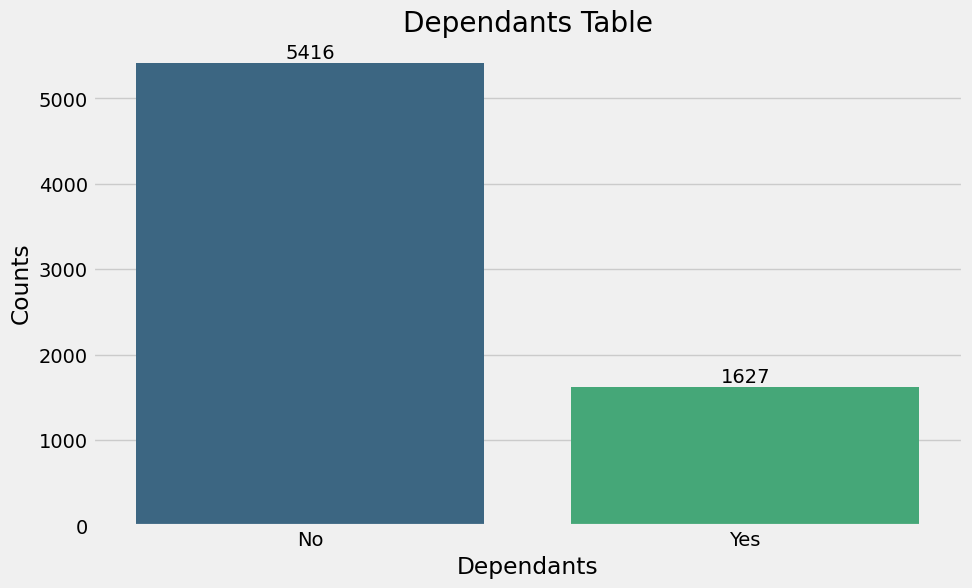

In [179]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Dependants')
plt.title('Dependants Table')
plt.ylabel('Counts')
plt.show()

- Most Customers have no Dependants

### Tenure Months

In [180]:
counts=df['Tenure Months'].describe()

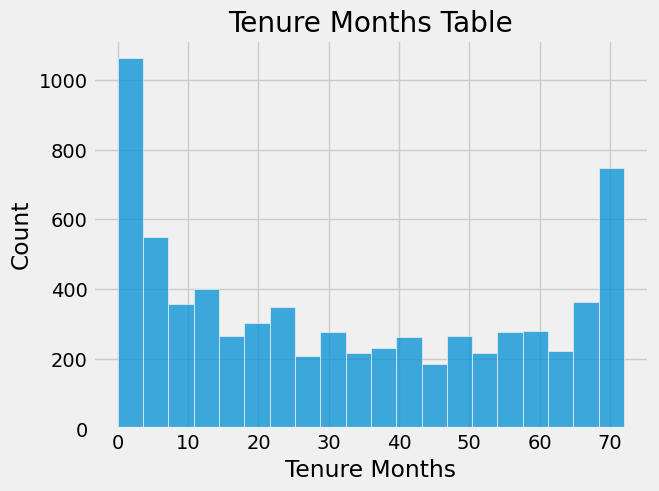

In [181]:
sns.histplot(x=df['Tenure Months'],bins=20)
plt.title("Tenure Months Table")
plt.xlabel("Tenure Months")
plt.ylabel('Count')
plt.show()

- Averages 0 or 70 

### Phone Services Column

In [182]:
counts=df['Phone Service'].value_counts()
counts

Phone Service
Yes    6361
No      682
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\1767998606.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


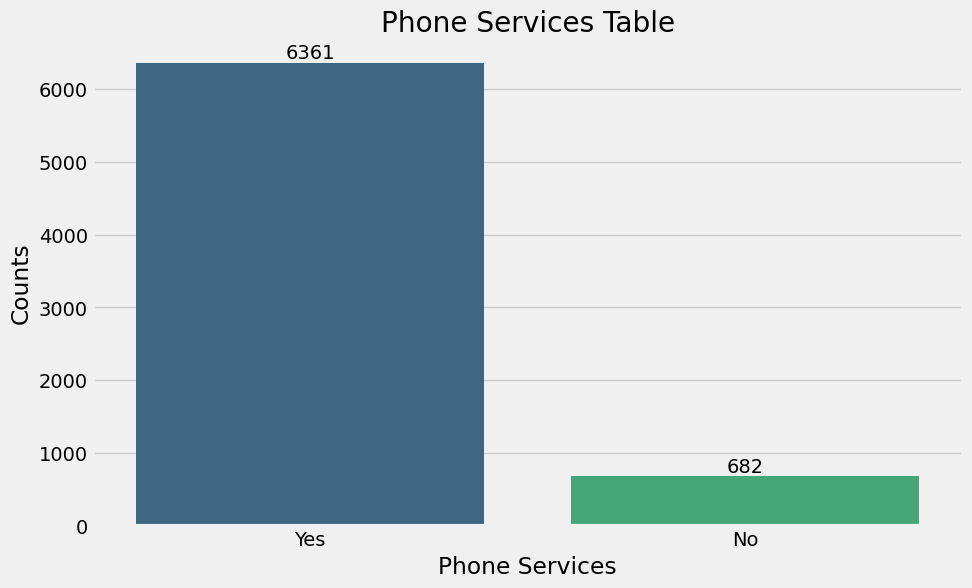

In [183]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Phone Services')
plt.title('Phone Services Table')
plt.ylabel('Counts')
plt.show()

- Most Customers have Phone Services 

### Multiples Lines Column

In [184]:
counts=df['Multiple Lines'].value_counts()
counts

Multiple Lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\795053649.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


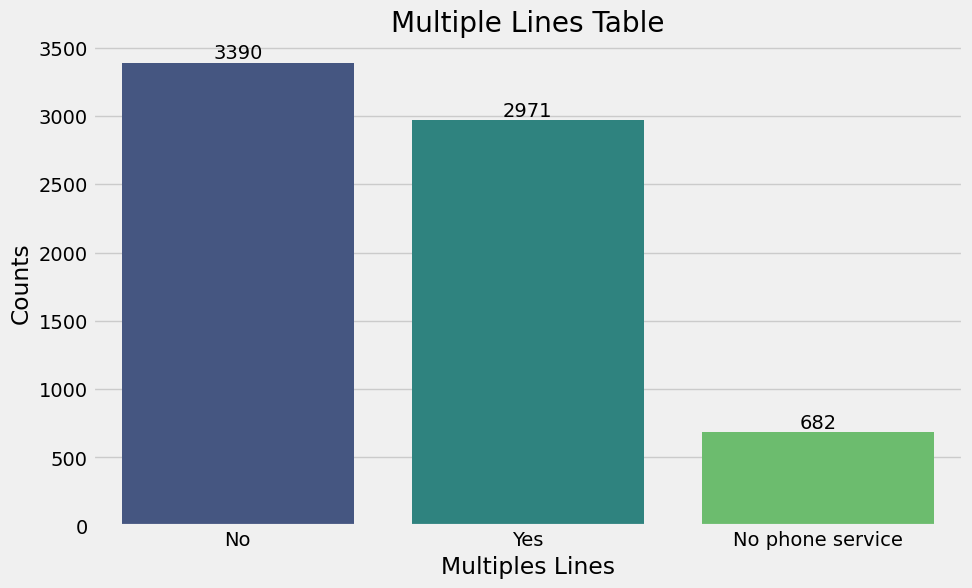

In [185]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Multiples Lines')
plt.title('Multiple Lines Table')
plt.ylabel('Counts')
plt.show()

- Most Customers have no Multiple Lines

### Internet Services Column

In [186]:
counts=df['Internet Service'].value_counts()
counts

Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\357518884.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


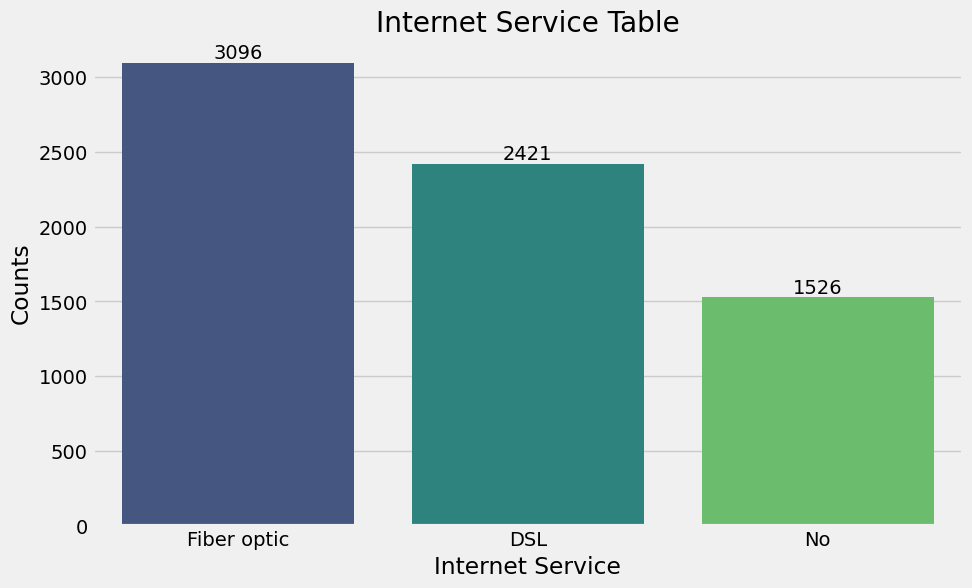

In [187]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Internet Service')
plt.title('Internet Service Table')
plt.ylabel('Counts')
plt.show()

- Most Customers have Fiber Optic internet Service

### Online Security Column

In [188]:
counts=df['Online Security'].value_counts()
counts

Online Security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\3459212693.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


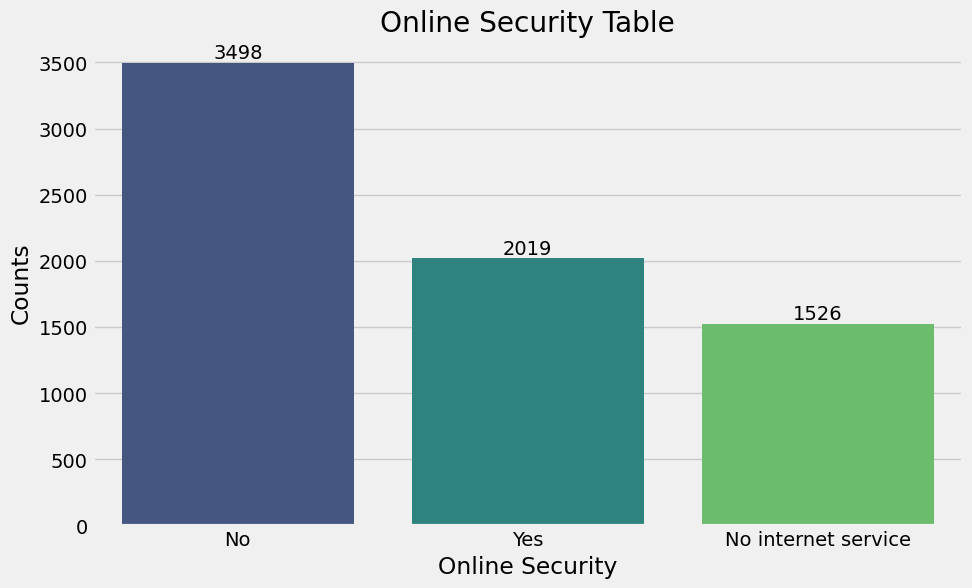

In [189]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Online Security')
plt.title('Online Security Table')
plt.ylabel('Counts')
plt.show()

- Most Customers have no Online Security

### Online Backup Column

In [190]:
counts=df['Online Backup'].value_counts()
counts

Online Backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\3821731093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


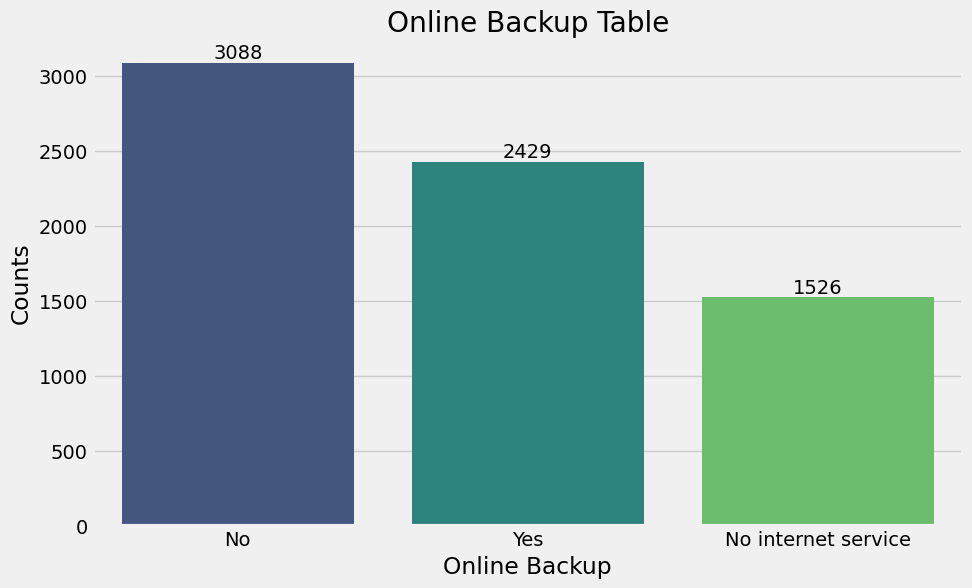

In [191]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Online Backup')
plt.title('Online Backup Table')
plt.ylabel('Counts')
plt.show()

- Most Customers have no Online Backup

### Device Protection Column

In [192]:
counts=df['Device Protection'].value_counts()
counts

Device Protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\4251974434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


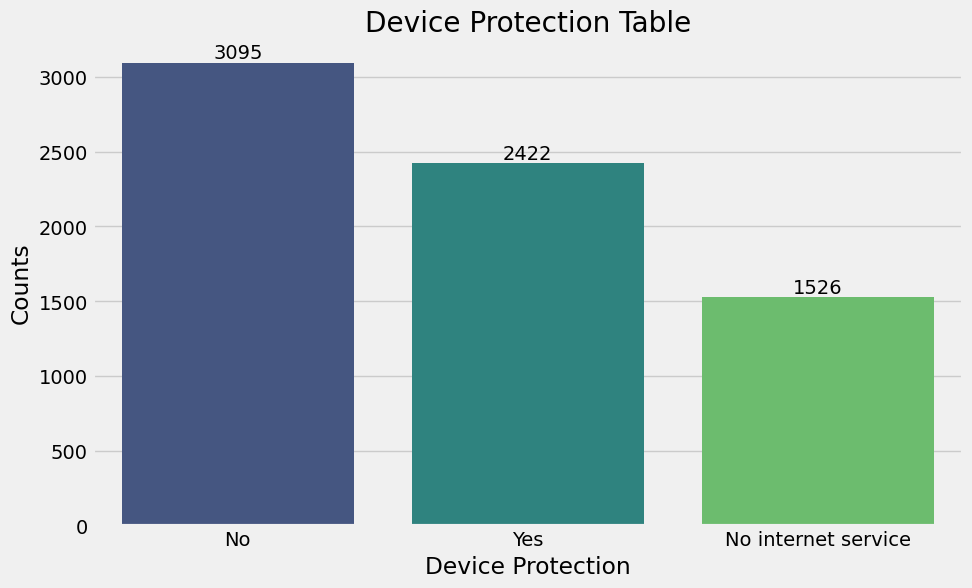

In [193]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Device Protection')
plt.title('Device Protection Table')
plt.ylabel('Counts')
plt.show()

- Most Customers have no Device Protection

### Tech Support Column

In [194]:
counts=df['Tech Support'].value_counts()
counts

Tech Support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\1372710108.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


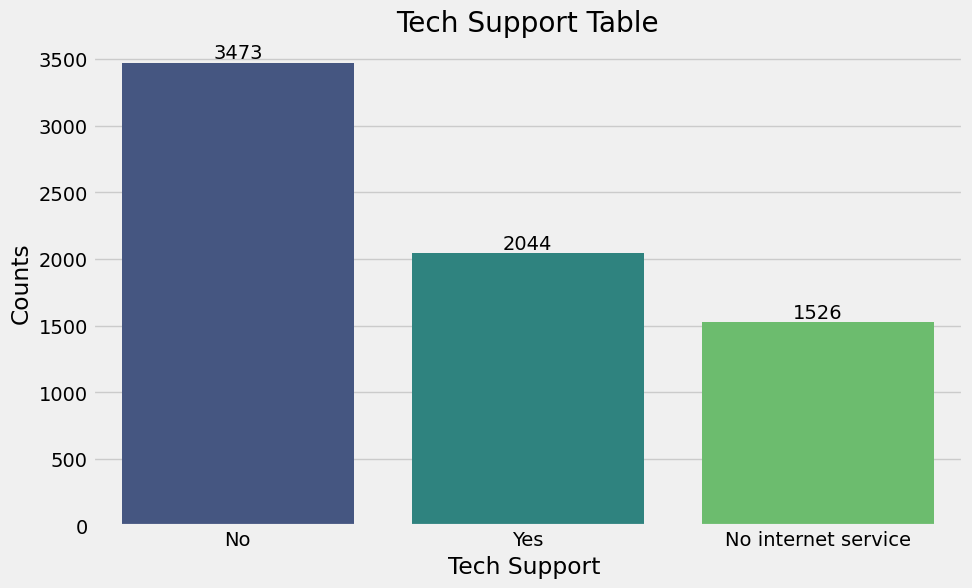

In [195]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Tech Support ')
plt.title('Tech Support Table')
plt.ylabel('Counts')
plt.show()

- Most Customers have no Tech Support 

### Streaming TV Column

In [196]:
counts=df['Streaming TV'].value_counts()
counts

Streaming TV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\220151461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


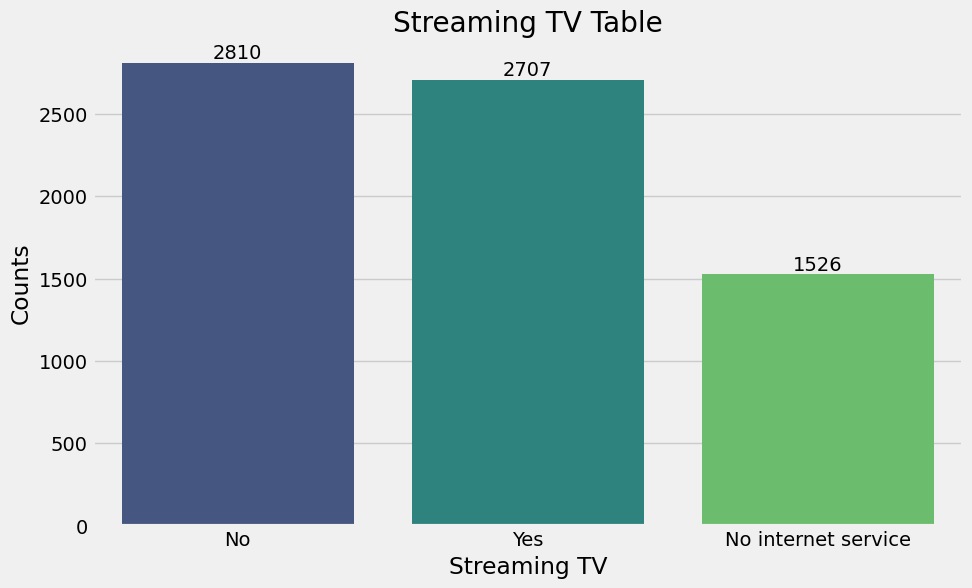

In [197]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Streaming TV')
plt.title('Streaming TV Table')
plt.ylabel('Counts')
plt.show()

- Customers have Slightly More no Streaming TV Than Streaming TV

### Streaming Movies Column

In [198]:
counts=df['Streaming Movies'].value_counts()
counts

Streaming Movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\2969376428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


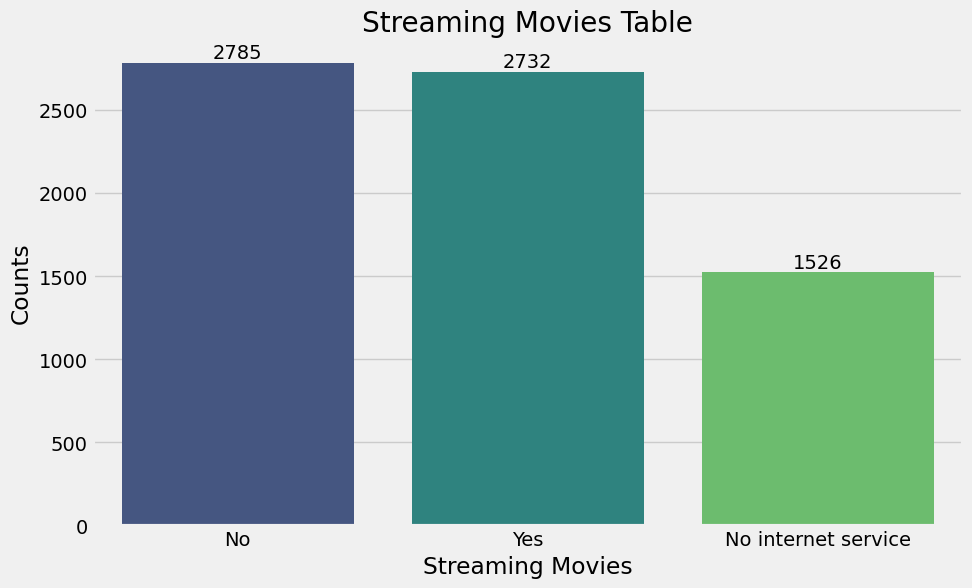

In [199]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Streaming Movies')
plt.title('Streaming Movies Table')
plt.ylabel('Counts')
plt.show()

- Customers slightly no Streaming Movies than Customers who Stream Movies

### Contract Column

In [200]:
counts=df.Contract.value_counts()
counts

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\2584948889.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


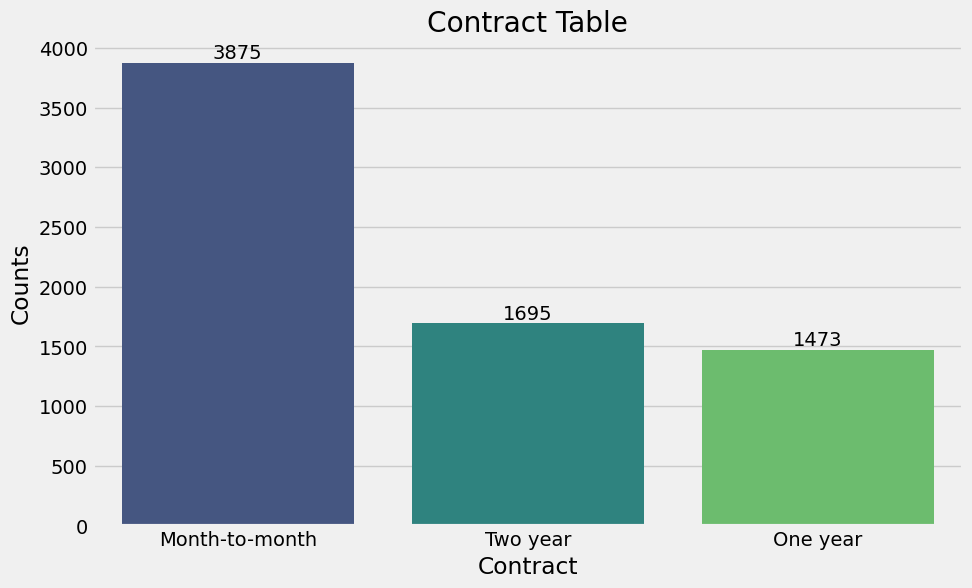

In [201]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Contract')
plt.title('Contract Table')
plt.ylabel('Counts')
plt.show()

- Most Customers have Month to Month Contract

### Paperless Billing Column

In [202]:
counts=df['Paperless Billing'].value_counts()
counts

Paperless Billing
Yes    4171
No     2872
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\484797686.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


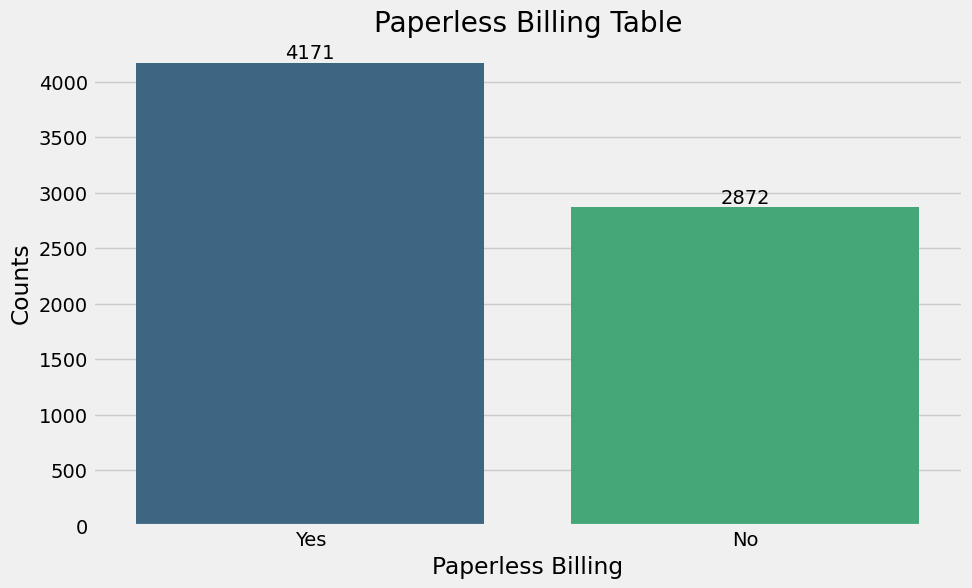

In [203]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Paperless Billing')
plt.title('Paperless Billing Table')
plt.ylabel('Counts')
plt.show()

- Most Customers have Paperless Billing

### Payment Method Column

In [204]:
counts=df['Payment Method'].value_counts()
counts

Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\2694420977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


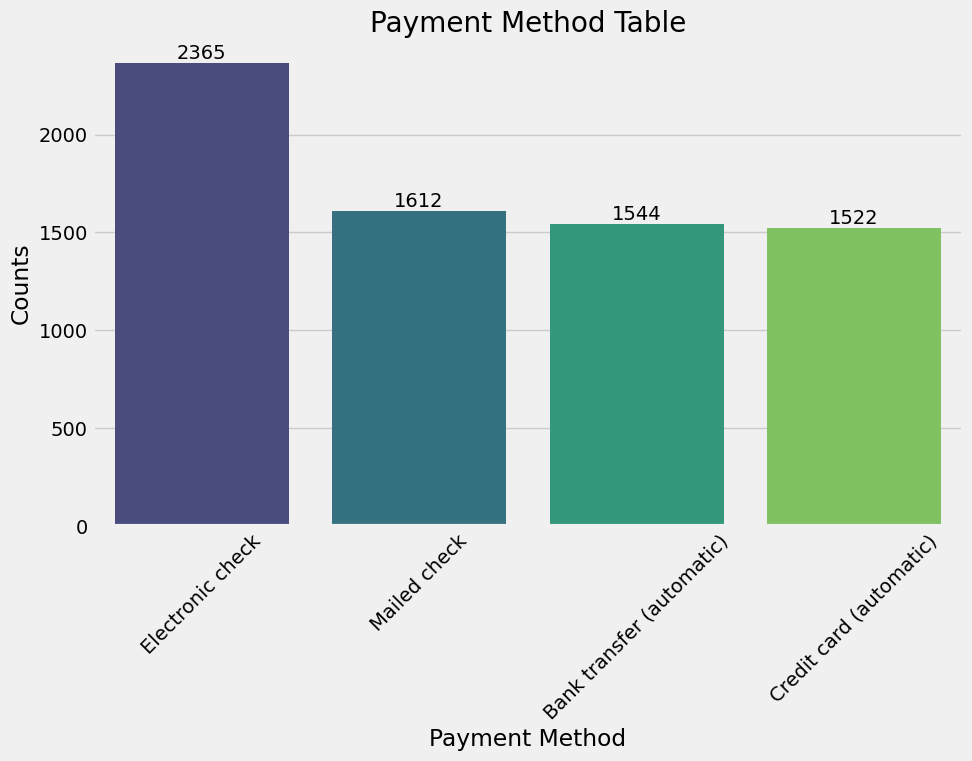

In [205]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Payment Method')
plt.title('Payment Method Table')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

- Most Customers have Electronic Check as Payment Method 

### Monthly Charges Column

In [206]:
counts=df['Monthly Charges'].describe()
counts

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: Monthly Charges, dtype: float64

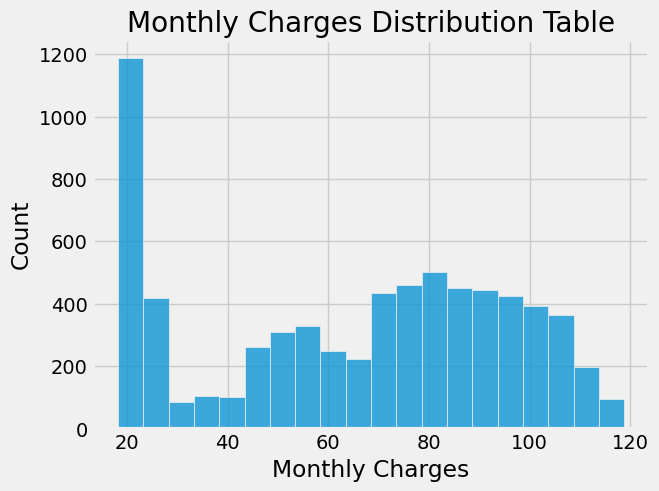

In [207]:
sns.histplot(x=df['Monthly Charges'],bins=20)
plt.title("Monthly Charges Distribution Table")
plt.xlabel("Monthly Charges")
plt.ylabel('Count')
plt.show()

- Most Customers Averages 20-30 Monthly Charges

### Total Charges Column

In [208]:
df['Total Charges'] = df['Total Charges'].replace(" ", 0)
df['Total Charges'] = df['Total Charges'].astype(int)

In [209]:
df['Total Charges'].describe()

count    7043.000000
mean     2279.265086
std      2266.790864
min         0.000000
25%       398.000000
50%      1394.000000
75%      3786.500000
max      8684.000000
Name: Total Charges, dtype: float64

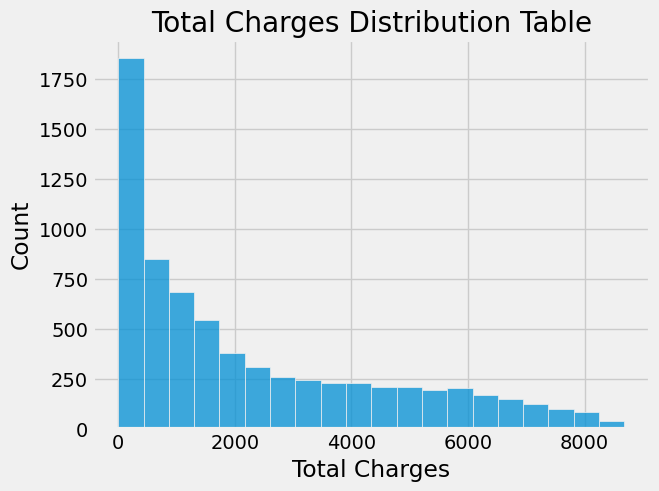

In [210]:
sns.histplot(x=df['Total Charges'],bins=20)
plt.title("Total Charges Distribution Table")
plt.xlabel("Total Charges")
plt.ylabel('Count')
plt.show()

- Most Customers averages 0-1500 Total Charges

### Churn Label Column

In [211]:
counts=df['Churn Label'].value_counts()
counts

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_33380\150064890.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')


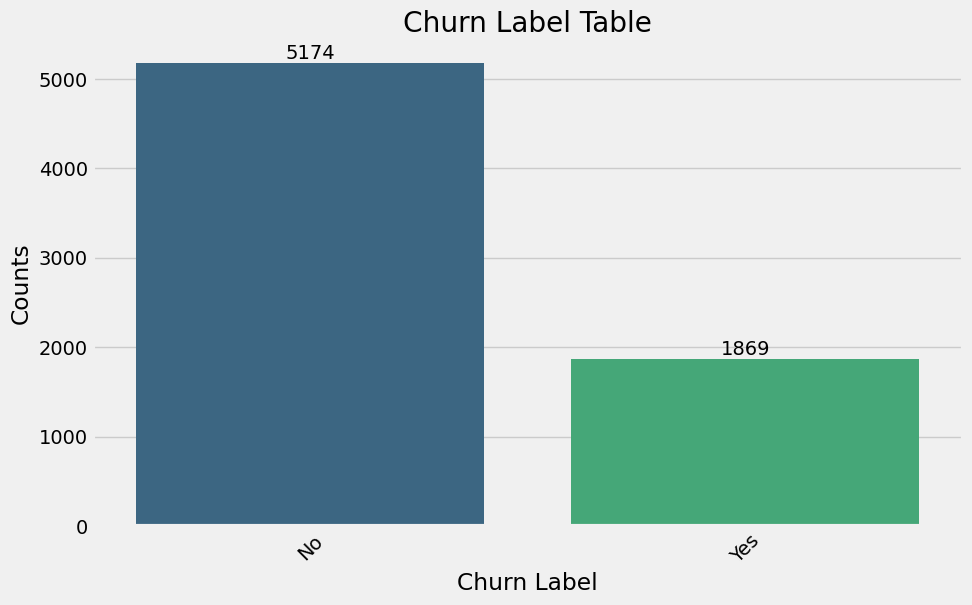

In [212]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Churn Label')
plt.title('Churn Label Table')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

- Most Customers have No as Churn Label

### Churn Score Column

In [213]:
counts=df['Churn Score'].describe()
counts

count    7043.000000
mean       58.699418
std        21.525131
min         5.000000
25%        40.000000
50%        61.000000
75%        75.000000
max       100.000000
Name: Churn Score, dtype: float64

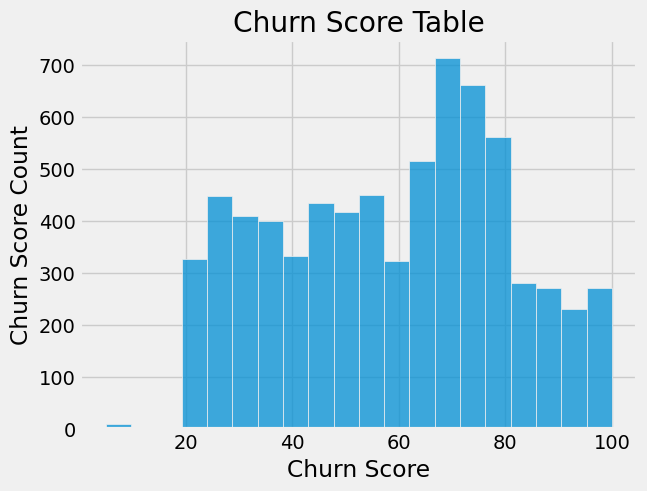

In [214]:
sns.histplot(x=df['Churn Score'],bins=20)
plt.title("Churn Score Table")
plt.xlabel("Churn Score")
plt.ylabel('Churn Score Count')
plt.show()

### CLTV Column

In [215]:
counts=df.CLTV.describe()
counts

count    7043.000000
mean     4400.295755
std      1183.057152
min      2003.000000
25%      3469.000000
50%      4527.000000
75%      5380.500000
max      6500.000000
Name: CLTV, dtype: float64

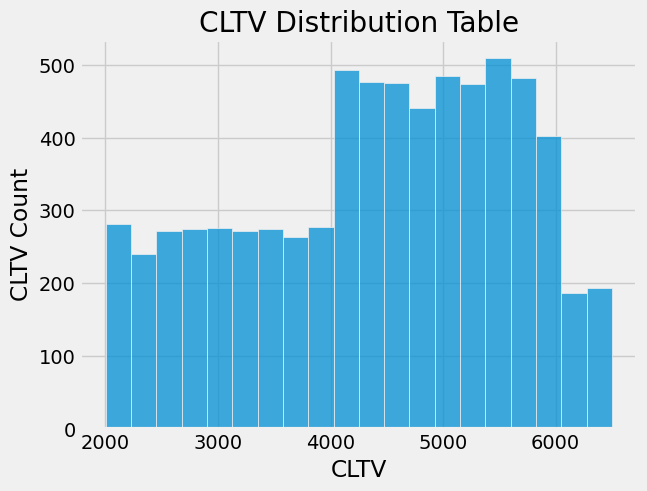

In [216]:
sns.histplot(x=df['CLTV'],bins=20)
plt.title("CLTV Distribution Table")
plt.xlabel("CLTV")
plt.ylabel('CLTV Count')
plt.show()

- Most Customers averages between 4000 and 6000 

In [217]:
df.describe()

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,36.282441,-119.798880,32.371149,64.761692,2279.265086,0.265370,58.699418,4400.295755
std,2.455723,2.157889,24.559481,30.090047,2266.790864,0.441561,21.525131,1183.057152
min,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000,5.000000,2003.000000
25%,34.030915,-121.815412,9.000000,35.500000,398.000000,0.000000,40.000000,3469.000000
50%,36.391777,-119.730885,29.000000,70.350000,1394.000000,0.000000,61.000000,4527.000000
75%,38.224869,-118.043237,55.000000,89.850000,3786.500000,1.000000,75.000000,5380.500000
max,41.962127,-114.192901,72.000000,118.750000,8684.000000,1.000000,100.000000,6500.000000


# Machine Learning

## Preprocessing

- Defining X and Y

In [218]:
X=df.drop(['Churn Label'], axis=1)
y=df['Churn Label']

In [219]:
X

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,Los Angeles,33.964131,-118.272783,Male,No,No,No,2,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108,1,86,3239
1,Los Angeles,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151,1,67,2701
2,Los Angeles,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820,1,86,5372
3,Los Angeles,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046,1,84,5003
4,Los Angeles,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036,1,89,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,34.341737,-116.539416,Female,No,No,No,72,Yes,No,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419,0,45,5306
7039,Adelanto,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990,0,59,2140
7040,Amboy,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362,0,71,5560
7041,Angelus Oaks,34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,...,No,No,Month-to-month,Yes,Electronic check,29.60,346,0,59,2793


In [220]:
y

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
7038     No
7039     No
7040     No
7041     No
7042     No
Name: Churn Label, Length: 7043, dtype: object

- Encoding

In [221]:
encoder=LabelEncoder()
for col in X.columns:
	if X[col].dtype in ['O', 'object', 'category']:
		X[col]= encoder.fit_transform(X[col])

In [222]:
y = y.map({'No': 0, 'Yes': 1})

- Splitting

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- Models

In [224]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('LGBMClassifier', LGBMClassifier(verbose=-1)),
    ('CatBoostClassifier', CatBoostClassifier(verbose=False))
]


In [225]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('LGBMClassifier', LGBMClassifier(verbose=-1)),
    ('CatBoostClassifier', CatBoostClassifier(verbose=False)),
    ('KNN', KNeighborsClassifier())
]

results = []
for name, model in models:
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    confusion = confusion_matrix(y_test, y_test_pred)
    
    results.append({
        'Model': name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Accuracy Score': accuracy,
    })


results_df = pd.DataFrame(results)
display(results_df)

best_model = max(results, key=lambda x: x['Accuracy Score'])
best_model_name = best_model['Model']
best_model_accuracy = best_model['Accuracy Score']


print(f"Best Model: {best_model_name}")
print(f"Accuracy: {best_model_accuracy}")

c:\Users\George Hany\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\George Hany\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Train Score,Test Score,Accuracy Score
0,Logistic Regression,0.916227,0.902982,0.902982
1,Decision Tree,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000
3,AdaBoost Classifier,1.000000,1.000000,1.000000
4,Gradient Boosting Classifier,1.000000,1.000000,1.000000
5,XGBClassifier,1.000000,1.000000,1.000000
6,LGBMClassifier,1.000000,1.000000,1.000000
7,CatBoostClassifier,1.000000,1.000000,1.000000
8,KNN,0.804868,0.703739,0.703739


Best Model: Decision Tree
Accuracy: 1.0


- Best Model is Decision Tree 

# Deep Learning

Epoch 1/50


c:\Users\George Hany\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8623 - loss: 0.3593 - val_accuracy: 0.9972 - val_loss: 0.0216
Epoch 2/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9988 - loss: 0.0134 - val_accuracy: 0.9995 - val_loss: 0.0041
Epoch 3/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 4/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 8.8084e-04 - val_accuracy: 1.0000 - val_loss: 8.8164e-04
Epoch 5/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 4.1101e-04 - val_accuracy: 1.0000 - val_loss: 5.4740e-04
Epoch 6/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 2.3626e-04 - val_accuracy: 1.0000 - val_loss: 3.7314e-04
Epoch 7/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.5599e-04 - val_accuracy: 1.0000 - val_loss: 2.5998e-04
Epoch 8/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 9.91

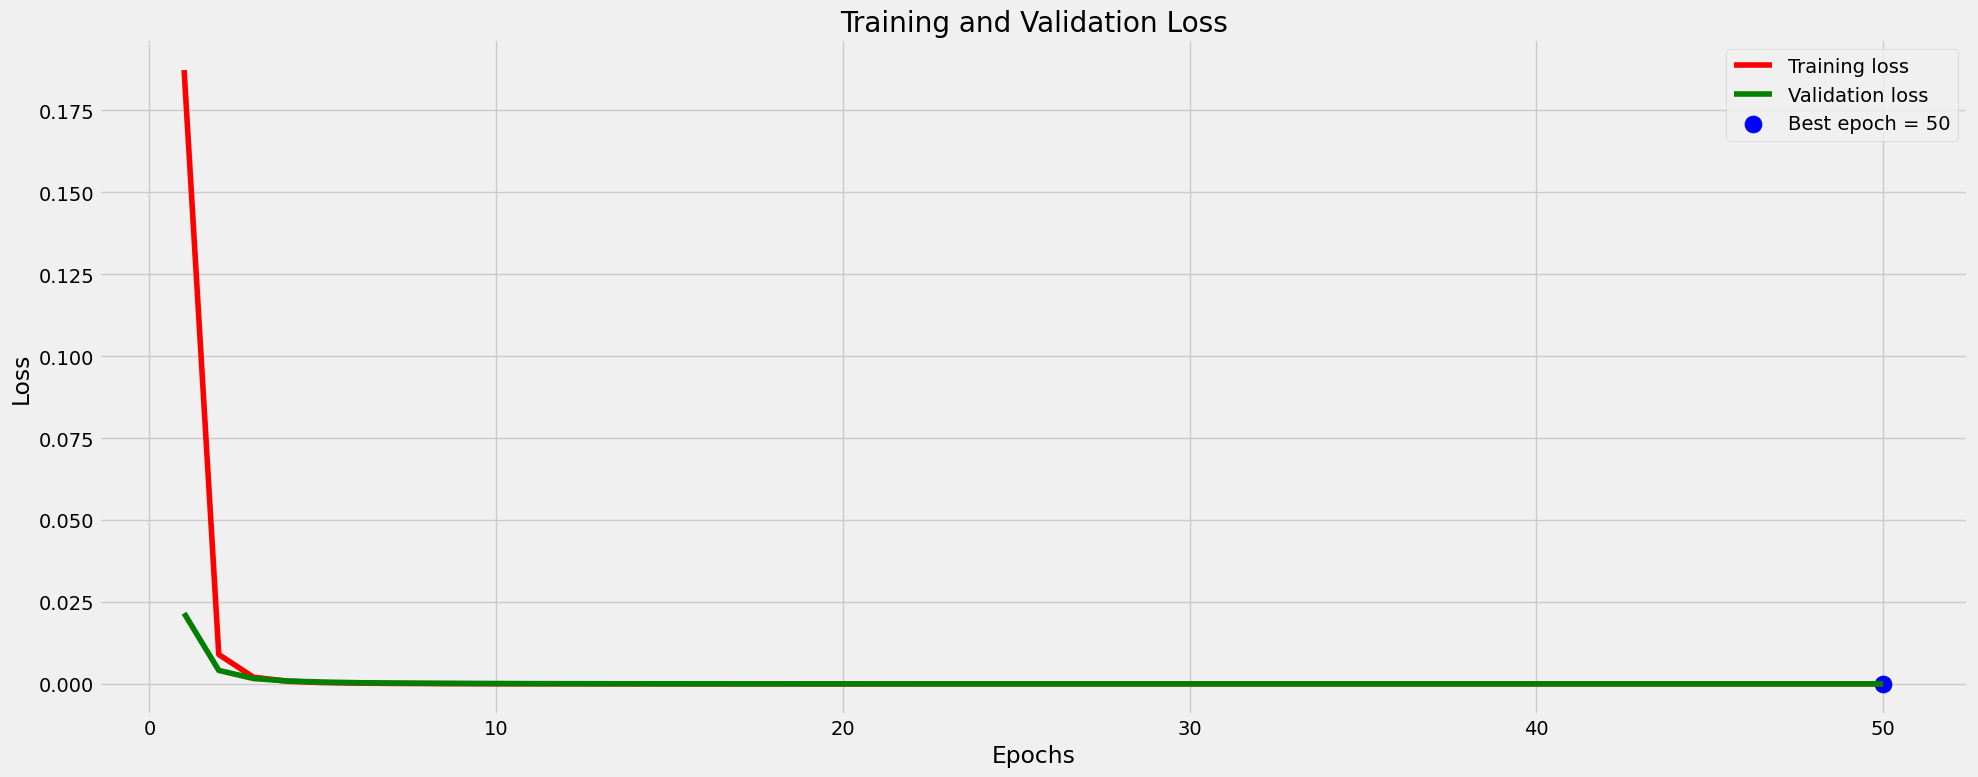

In [226]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build the ANN model
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=2, activation='softmax'))  # Two classes (binary)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and include validation data for tracking validation loss
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
confusion = confusion_matrix(y_test_classes, y_pred_classes)
score = model.evaluate(X_test, y_test, verbose=0)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Model Score: {score}")

# Plot training history for loss
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)  # Get index of the lowest validation loss
val_lowest = val_loss[index_loss]

# Plot training and validation loss
epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'Best epoch = {index_loss + 1}'

plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

plt.plot(epochs, tr_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [227]:
y_pred = model.predict(X_test)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
